In [149]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [150]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 500)

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearnex.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [152]:
url = 'https://raw.githubusercontent.com/chethanbr86/my_DataScience_MachineLearning_projects/main/AV_Jobathon_June2022/train_wn75k28.csv'
train = pd.read_csv(url, parse_dates=['created_at','signup_date'])
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0


In [153]:
url = 'https://raw.githubusercontent.com/chethanbr86/my_DataScience_MachineLearning_projects/main/AV_Jobathon_June2022/train_wn75k28.csv'
test = pd.read_csv(url, parse_dates=['created_at','signup_date'])
test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0


In [154]:
url = 'https://raw.githubusercontent.com/chethanbr86/my_DataScience_MachineLearning_projects/main/AV_Jobathon_June2022/sample_submission_2zvVjBu.csv'
sample = pd.read_csv(url)
sample

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1
...,...,...
13179,52341,1
13180,52342,1
13181,52343,1
13182,52344,1


In [155]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [156]:
details(train)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
id,0,0.000000,int64,39161
created_at,0,0.000000,datetime64[ns],365
campaign_var_1,0,0.000000,int64,16
campaign_var_2,0,0.000000,int64,15
products_purchased,20911,53.397513,float64,4
signup_date,15113,38.591966,datetime64[ns],1800
user_activity_var_1,0,0.000000,int64,4
user_activity_var_2,0,0.000000,int64,2
user_activity_var_3,0,0.000000,int64,2
user_activity_var_4,0,0.000000,int64,2


In [157]:
train['buy'].value_counts(dropna=False)

0    37163
1     1998
Name: buy, dtype: int64

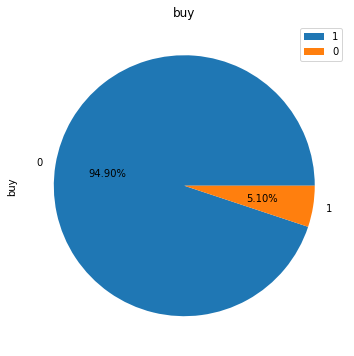

In [158]:
round(100*train['buy'].value_counts(),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("buy")
plt.legend(["1", "0"])
plt.show()

This is an imbalanced dataset where 0 means not buying and 1 means buying.

In [159]:
col_cat = [i for i in train.columns if train[i].dtype == object]
col_cat

[]

In [160]:
col_num = [i for i in train.columns if train[i].dtype != object]
col_num.remove('id')
col_num.remove('created_at')
col_num.remove('signup_date')
col_num.remove('buy')

In [161]:
col_num

['campaign_var_1',
 'campaign_var_2',
 'products_purchased',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_9',
 'user_activity_var_10',
 'user_activity_var_11',
 'user_activity_var_12']

In [162]:
def catcol(df, col): 
    for cat in col:
        print(cat)
        print('--------------------------')
        print(df[cat].value_counts(dropna=False))
        print('=====================================================')

In [163]:
catcol(train,col_num)

campaign_var_1
--------------------------
6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64
campaign_var_2
--------------------------
6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64
products_purchased
--------------------------
NaN    20911
2.0     8867
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64
user_activity_var_1
--------------------------
0    23869
1    14917
2      374
3        1
Name: user_activity_var_1, dtype: int64
user_activity_var_2
--------------------------
0    38898
1      263
Name: user_activity_var_2, dtype: int64
user_activity_var_3
--------------------------
0    35134
1     4027
Name: user_activity_var_3, dtype: int64
user_a

In [164]:
train[col_num].describe(percentiles=(.01,.05,.25,.5,.75,.9,.95,.99))

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562
std,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,11.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


outliers

In [165]:
def outlier(df, num):
    plt.figure(figsize=(15,30))
    for i in enumerate(num):
        plt.subplot(5,3,i[0]+1)
        sns.boxplot(df[i[1]])

    plt.figure(figsize=(15,30))
    for j in enumerate(num):
        plt.subplot(5,3,j[0]+1)
        sns.kdeplot(df[j[1]], color='orange')

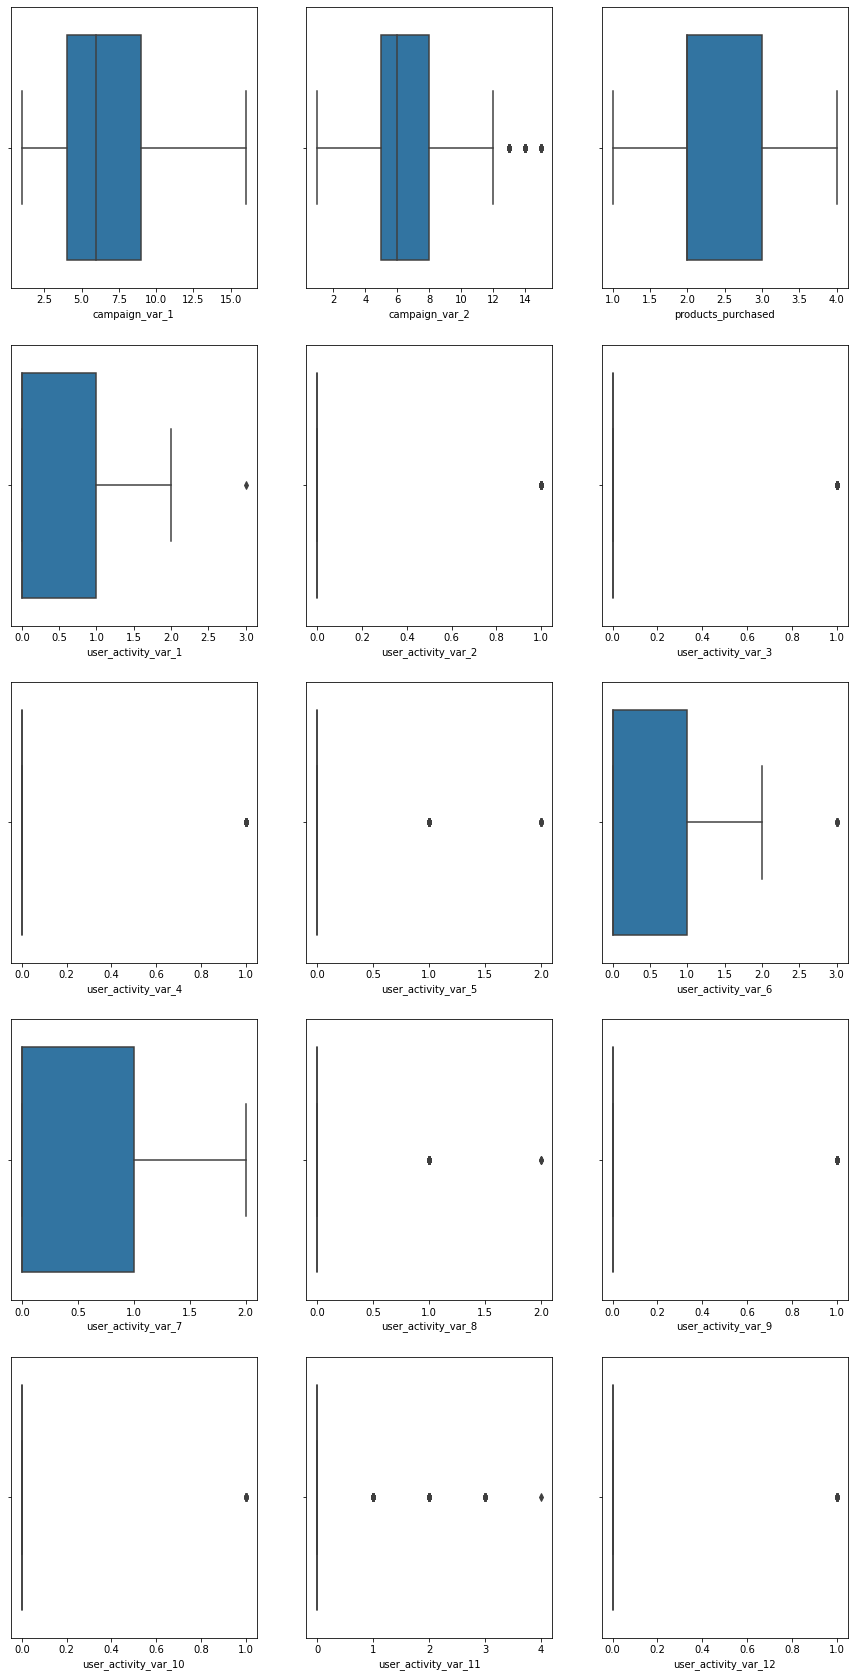

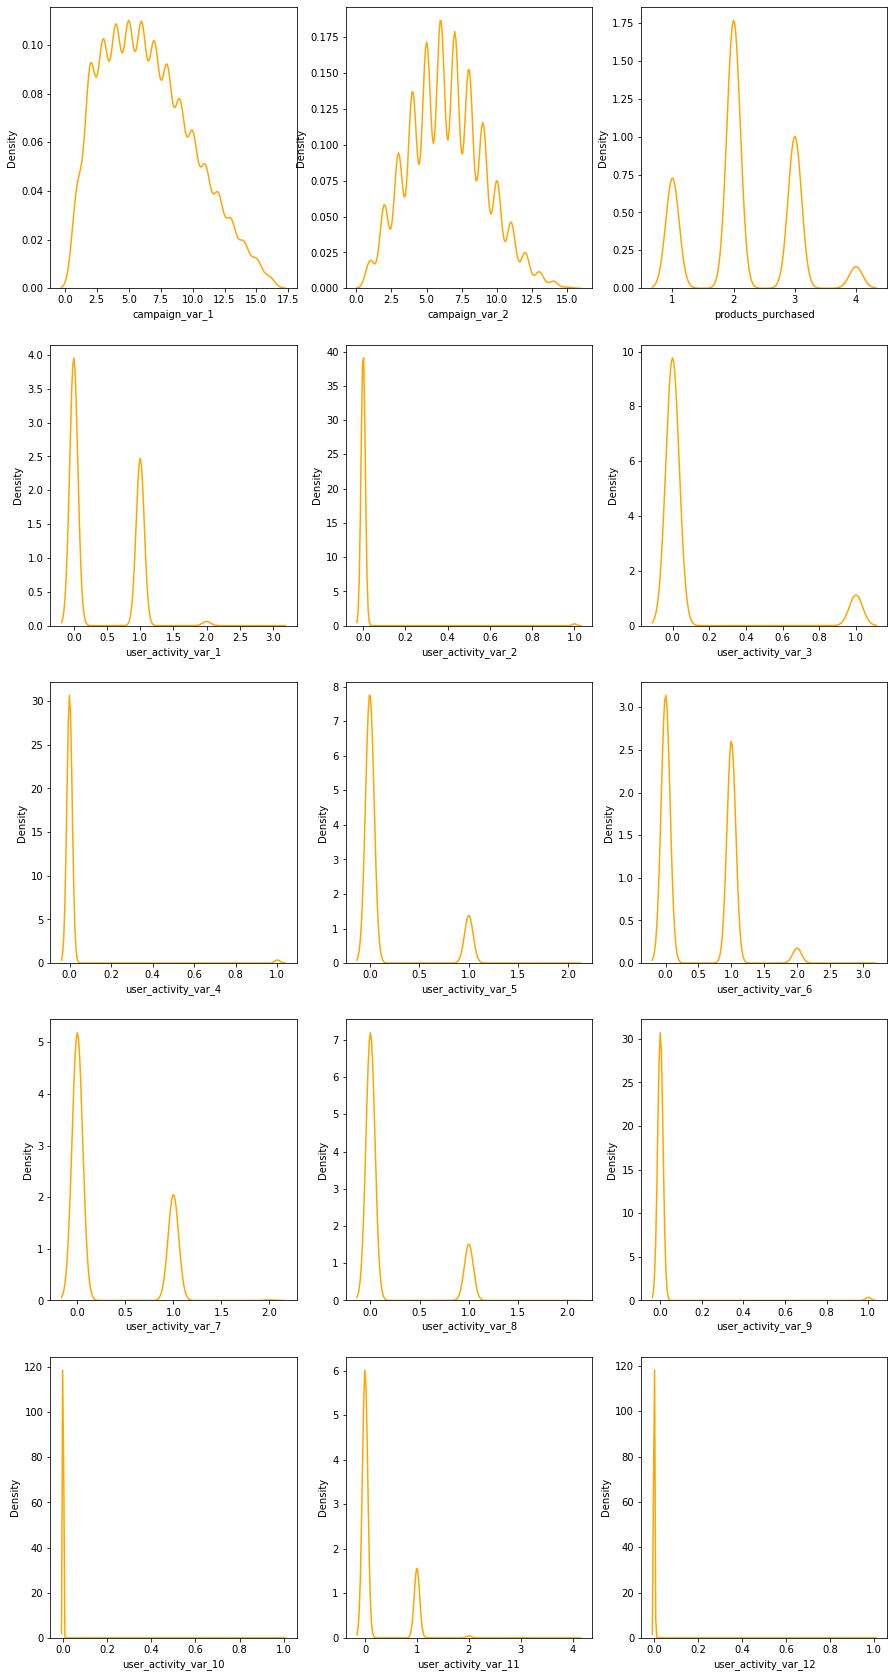

In [166]:
outlier(train,col_num)

Handling null values in numerical column

In [167]:
train.groupby(train['products_purchased'].isnull())['buy'].mean()
train['products_purchased_buy'] = np.where(train['products_purchased'].isnull(), 0, 1)
train.drop(['products_purchased'],1,inplace=True)
train

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_buy
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1
39157,39158,2021-12-31,3,9,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39158,39159,2021-12-31,8,7,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0,1
39159,39160,2021-12-31,7,12,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [168]:
train['products_purchased_buy'].value_counts()

0    20911
1    18250
Name: products_purchased_buy, dtype: int64

Handling null values in date column and replacing it with median of dates

In [169]:
median_impute_date = train['signup_date'].median()
train['signup_date'] = train['signup_date'].replace(np.nan, median_impute_date)
train

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_buy
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1
39157,39158,2021-12-31,3,9,2020-12-11,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39158,39159,2021-12-31,8,7,2020-12-11,1,0,0,0,1,0,1,0,0,0,0,0,0,1
39159,39160,2021-12-31,7,12,2020-12-11,0,0,0,0,0,1,0,0,0,0,1,0,0,1


Handling Dates

In [170]:
train['created_week_day'] = train['created_at'].dt.day_name()
# train['created_day_no'] = train['created_at'].dt.day
train['created_month_name'] = train['created_at'].dt.month_name()
train['created_year'] = train['created_at'].dt.year

In [171]:
train['signup_week_day'] = train['signup_date'].dt.day_name()
# train['signup_day_no'] = train['signup_date'].dt.day
train['signup_month_name'] = train['signup_date'].dt.month_name()
train['signup_year'] = train['signup_date'].dt.year

In [172]:
train

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_buy,created_week_day,created_month_name,created_year,signup_week_day,signup_month_name,signup_year
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,1,Friday,January,2021,Thursday,September,2020
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,1,Friday,January,2021,Saturday,September,2020
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Friday,January,2021,Wednesday,August,2021
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Friday,January,2021,Wednesday,October,2017
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,0,Friday,January,2021,Monday,June,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1,Friday,December,2021,Thursday,October,2017
39157,39158,2021-12-31,3,9,2020-12-11,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Friday,December,2021,Friday,December,2020
39158,39159,2021-12-31,8,7,2020-12-11,1,0,0,0,1,0,1,0,0,0,0,0,0,1,Friday,December,2021,Friday,December,2020
39159,39160,2021-12-31,7,12,2020-12-11,0,0,0,0,0,1,0,0,0,0,1,0,0,1,Friday,December,2021,Friday,December,2020


In [173]:
train

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_buy,created_week_day,created_month_name,created_year,signup_week_day,signup_month_name,signup_year
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,1,Friday,January,2021,Thursday,September,2020
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,1,Friday,January,2021,Saturday,September,2020
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Friday,January,2021,Wednesday,August,2021
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Friday,January,2021,Wednesday,October,2017
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,0,Friday,January,2021,Monday,June,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1,Friday,December,2021,Thursday,October,2017
39157,39158,2021-12-31,3,9,2020-12-11,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Friday,December,2021,Friday,December,2020
39158,39159,2021-12-31,8,7,2020-12-11,1,0,0,0,1,0,1,0,0,0,0,0,0,1,Friday,December,2021,Friday,December,2020
39159,39160,2021-12-31,7,12,2020-12-11,0,0,0,0,0,1,0,0,0,0,1,0,0,1,Friday,December,2021,Friday,December,2020


In [174]:
col_cat = [i for i in train.columns if train[i].dtype == object]
col_cat

['created_week_day',
 'created_month_name',
 'signup_week_day',
 'signup_month_name']

ohe for all columns

In [175]:
ohe = OneHotEncoder(sparse=False)
ohe_df1 = pd.DataFrame(ohe.fit_transform(train[col_cat]),columns=ohe.get_feature_names())
train.index = ohe_df1.index
train = pd.concat([train, ohe_df1],1)
train.drop(['created_at','signup_date','created_week_day','created_month_name','created_year','signup_week_day','signup_month_name','signup_year'],1,inplace=True)

In [176]:
train

,id,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_buy,x0_Friday,x0_Monday,x0_Saturday,x0_Sunday,x0_Thursday,x0_Tuesday,x0_Wednesday,x1_April,x1_August,x1_December,x1_February,x1_January,x1_July,x1_June,x1_March,x1_May,x1_November,x1_October,x1_September,x2_Friday,x2_Monday,x2_Saturday,x2_Sunday,x2_Thursday,x2_Tuesday,x2_Wednesday,x3_April,x3_August,x3_December,x3_February,x3_January,x3_July,x3_June,x3_March,x3_May,x3_November,x3_October,x3_September
0,1,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,11,11,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39157,39158,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39158,39159,8,7,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39159,39160,7,12,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Removing columns on basis of heatmap

In [177]:
col_num = [i for i in train.columns if train[i].dtype != object]
col_num.remove('id')
col_num.remove('buy')
col_num

['campaign_var_1',
 'campaign_var_2',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_9',
 'user_activity_var_10',
 'user_activity_var_11',
 'user_activity_var_12',
 'products_purchased_buy',
 'x0_Friday',
 'x0_Monday',
 'x0_Saturday',
 'x0_Sunday',
 'x0_Thursday',
 'x0_Tuesday',
 'x0_Wednesday',
 'x1_April',
 'x1_August',
 'x1_December',
 'x1_February',
 'x1_January',
 'x1_July',
 'x1_June',
 'x1_March',
 'x1_May',
 'x1_November',
 'x1_October',
 'x1_September',
 'x2_Friday',
 'x2_Monday',
 'x2_Saturday',
 'x2_Sunday',
 'x2_Thursday',
 'x2_Tuesday',
 'x2_Wednesday',
 'x3_April',
 'x3_August',
 'x3_December',
 'x3_February',
 'x3_January',
 'x3_July',
 'x3_June',
 'x3_March',
 'x3_May',
 'x3_November',
 'x3_October',
 'x3_September']

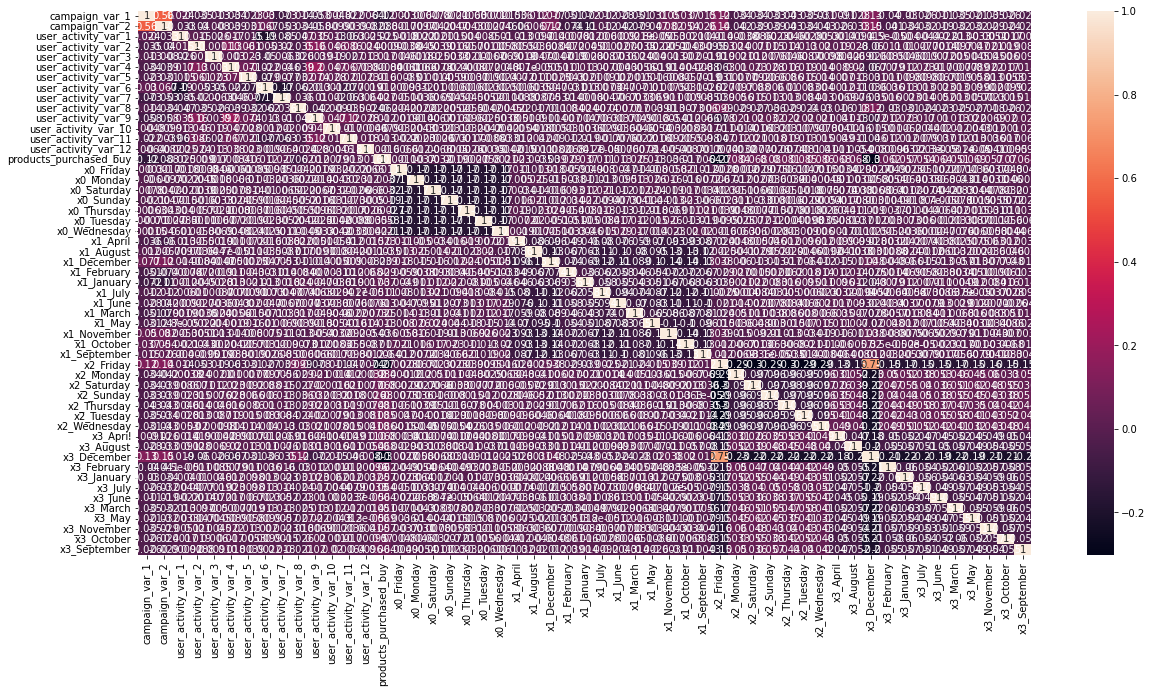

In [178]:
plt.figure(figsize=(20, 10))
sns.heatmap(train[col_num].corr(), annot=True)  #in col_num, there is not target, but see if its needed in heatmap
plt.show()

In [179]:
corr_matrix = train[col_num].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 as they are highly correlated
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

[]

Removing columns on basis of chi2

In [180]:
col_num = [i for i in train.columns if train[i].dtype != object]
col_num.remove('id')
col_num.remove('buy')
col_num

['campaign_var_1',
 'campaign_var_2',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_9',
 'user_activity_var_10',
 'user_activity_var_11',
 'user_activity_var_12',
 'products_purchased_buy',
 'x0_Friday',
 'x0_Monday',
 'x0_Saturday',
 'x0_Sunday',
 'x0_Thursday',
 'x0_Tuesday',
 'x0_Wednesday',
 'x1_April',
 'x1_August',
 'x1_December',
 'x1_February',
 'x1_January',
 'x1_July',
 'x1_June',
 'x1_March',
 'x1_May',
 'x1_November',
 'x1_October',
 'x1_September',
 'x2_Friday',
 'x2_Monday',
 'x2_Saturday',
 'x2_Sunday',
 'x2_Thursday',
 'x2_Tuesday',
 'x2_Wednesday',
 'x3_April',
 'x3_August',
 'x3_December',
 'x3_February',
 'x3_January',
 'x3_July',
 'x3_June',
 'x3_March',
 'x3_May',
 'x3_November',
 'x3_October',
 'x3_September']

In [181]:
df = pd.DataFrame(columns=["Column_Name","Count"])
for cat in col_num:
    unique_value_count = len(train[cat].unique())
    df = df.append({'Column_Name': cat, "Count":int(unique_value_count)}, ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)
columns_unique_value

array([ 2,  3,  4, 16, 15,  5])

In [182]:
columns_to_drop_cat = set()
correlated_columns = dict()
for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train[columns_compare_against],train[column_to_compare])
            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [183]:
print(len(columns_to_drop_cat))
print(columns_to_drop_cat)

42
{'x0_Saturday', 'x3_December', 'x1_September', 'x3_November', 'x0_Thursday', 'x1_August', 'x1_April', 'user_activity_var_6', 'x2_Thursday', 'x3_October', 'x3_August', 'x1_November', 'x2_Wednesday', 'x1_March', 'x3_February', 'user_activity_var_12', 'x2_Sunday', 'x0_Tuesday', 'x2_Monday', 'user_activity_var_9', 'x0_Monday', 'x3_July', 'x1_January', 'x0_Wednesday', 'user_activity_var_8', 'x3_May', 'x1_October', 'user_activity_var_4', 'x1_June', 'x3_June', 'x3_April', 'x2_Friday', 'x2_Tuesday', 'x3_March', 'x1_December', 'x3_September', 'x2_Saturday', 'x0_Sunday', 'user_activity_var_10', 'products_purchased_buy', 'x1_May', 'x1_July'}


In [184]:
train.drop(columns_to_drop_cat,1,inplace=True)
train

,id,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_5,user_activity_var_7,user_activity_var_11,buy,x0_Friday,x1_February,x3_January
0,1,1,2,0,0,0,0,1,0,0,1.0,0.0,0.0
1,2,2,1,1,0,1,0,1,0,0,1.0,0.0,0.0
2,3,9,3,1,0,0,0,0,0,0,1.0,0.0,0.0
3,4,6,7,0,0,0,0,0,0,0,1.0,0.0,0.0
4,5,4,6,0,0,0,0,1,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,11,11,1,0,0,1,1,0,0,1.0,0.0,0.0
39157,39158,3,9,0,0,0,0,0,0,0,1.0,0.0,0.0
39158,39159,8,7,1,0,0,1,1,0,0,1.0,0.0,0.0
39159,39160,7,12,0,0,0,0,0,1,0,1.0,0.0,0.0


Train Test Split

In [ ]:
X,y = train.drop(['id','buy'],axis=1),train['buy']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=23)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

Power Transformer

In [ ]:
col_num_X_train = [i for i in X_train.columns if X_train[i].dtype != object]
col_num_X_train

In [ ]:
col_num_X_val = [i for i in X_val.columns if X_val[i].dtype != object]
col_num_X_val

In [ ]:
pt = PowerTransformer(copy=False)
X_train[col_num_X_train] = pt.fit_transform(X_train[col_num_X_train])
X_val[col_num_X_val] = pt.transform(X_val[col_num_X_val])

In [ ]:
model_list = list()
resample  = list()
roc_train_list = list()
roc_valid_list = list()
auc_train_list = list()
auc_valid_list = list()
f1_score_list = list()

In [ ]:
model_LR = LogisticRegression(random_state = 23)
model_DT = DecisionTreeClassifier(random_state = 23)
model_RF = RandomForestClassifier(random_state=23, oob_score = True, bootstrap=True)
model_LGBM = lightgbm.LGBMClassifier(objective = 'binary', random_state=23)
model_XGB = XGBClassifier(random_state=23, tree_method = 'gpu_hist', predictor='gpu_predictor', use_label_encoder=False)

In [ ]:
params_LR = {
    'penalty': ['none','l1','l2','elasticnet'],
    'C': [0, 0.2,0.4,0.6,0.8,1],
    'solver' : ['newton-cg', 'sag','lbfgs', 'liblinear', 'saga'], 
    'max_iter': [5, 10, 20, 50, 100, 200],
    'l1_ratio': [0, 0.2,0.4,0.6,0.8,1]
} 

params_DT = {
    'max_depth': [5, 10, 20, 50, 100, 200],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'min_samples_split' : [5, 10, 20, 50, 100, 200]
} 

params_RF = {    
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50, 100, 200],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'min_samples_split' : [5, 10, 20, 50, 100, 200],
    'max_features': ['sqrt','log2'],
    'max_samples': [5, 10, 20, 50, 100, 200]
}

params_LGBM = {
    'n_estimators': [50, 100, 200],
    'boosting_type': ['gbdt','dart'],
    'max_depth': [5, 10, 20, 50, 100, 200], 
    'min_child_samples': [5, 10, 20, 50, 100, 200],
    'subsample': [0.2,0.4,0.6,0.8,1],        
    'learning_rate': np.linspace(0.01, 0.3, 10)
}

params_XGB = {
    'n_estimators': [50, 100, 200],
    'max_depth': np.arange(1,31,3),
    'min_split_loss': [5, 10, 20, 50, 100, 200],
    'sampling_method': ['uniform','gradient_based'],
    'subsample': [0.2, 0.4, 0.5, 0.6, 0.8, 1],
    'learning_rate': np.linspace(0.01, 0.3, 10)
}

In [ ]:
def model_fit_evaluation1(model_model, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    rcv_best = model_model.fit(X_train, y_train)
    
    y_train_prob = rcv_best.predict_proba(X_train)
    y_train_pred = rcv_best.predict(X_train)
    y_val_prob = rcv_best.predict_proba(X_valid)
    y_val_pred = rcv_best.predict(X_valid)
    
    matrix_train = confusion_matrix(y_train, y_train_pred)
    matrix_val = confusion_matrix(y_valid, y_val_pred)
    report_train = classification_report(y_train, y_train_pred)
    report_val = classification_report(y_valid, y_val_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    roc_val = roc_auc_score(y_valid, y_val_pred)
    auc_train = roc_auc_score(y_train, y_train_prob[:,1])
    auc_val = roc_auc_score(y_valid, y_val_prob[:,1])
    f1score_train = f1_score(y_train, y_train_pred, average='weighted')
    f1score_train = f1_score(y_valid, y_val_pred, average='weighted')
    
    print('F1_score for train')
    print('='*60)
    print(f1score_train,"\n")
    print('F1_score for val')
    print('='*60)
    print(f1score_train,"\n")
    print('AUCROC for train')
    print('='*60)
    print(roc_train,"\n")
    print('AUCROC for Val')
    print('='*60)
    print(roc_val,"\n")
    print('Confusion Matrix for train')
    print('='*60)
    print(matrix_train,"\n")
    print('Confusion Matrix for val')
    print('='*60)
    print(matrix_val,"\n")
    print('Classification Report for train')
    print('='*60)
    print(report_train,"\n")
    print('Classification Report for val')
    print('='*60)
    print(report_val,"\n")
    print('AUC-ROC prob for train')
    print('='*60)
    print(auc_train,'\n')
    print('AUC-ROC prob for val')
    print('='*60)
    print(auc_val,'\n')
    print('Roc-Auc-Curve for Train set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_train, y_train),'\n')
    print('Roc-Auc-Curve for Val set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_valid, y_valid),'\n')
    
    model_list.append(algo)
    resample.append(sampling)
    roc_train_list.append(roc_train)
    roc_valid_list.append(roc_val)
    auc_train_list.append(auc_train)
    auc_valid_list.append(auc_val)
    f1_score_list.append()

In [ ]:
def model_fit_evaluation2(model_model, params, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    rcv = RandomizedSearchCV(model_model, params, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)    
    rcv_best = rcv.best_estimator_
    
    print('\n')
    print('best estimator : ', rcv_best)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')

    y_train_prob = rcv_best.predict_proba(X_train)
    y_train_pred = rcv_best.predict(X_train)
    y_val_prob = rcv_best.predict_proba(X_valid)
    y_val_pred = rcv_best.predict(X_valid)
    
    matrix_train = confusion_matrix(y_train, y_train_pred)
    matrix_val = confusion_matrix(y_valid, y_val_pred)
    report_train = classification_report(y_train, y_train_pred)
    report_val = classification_report(y_valid, y_val_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    roc_val = roc_auc_score(y_valid, y_val_pred)
    auc_train = roc_auc_score(y_train, y_train_prob[:,1])
    auc_val = roc_auc_score(y_valid, y_val_prob[:,1])
    f1score_train = f1_score(y_train, y_train_pred, average='weighted')
    f1score_train = f1_score(y_valid, y_val_pred, average='weighted')
    
    print('F1_score for train')
    print('='*60)
    print(f1score_train,"\n")
    print('F1_score for val')
    print('='*60)
    print(f1score_train,"\n")
    print('AUCROC for train')
    print('='*60)
    print(roc_train,"\n")
    print('AUCROC for Val')
    print('='*60)
    print(roc_val,"\n")
    print('Confusion Matrix for train')
    print('='*60)
    print(matrix_train,"\n")
    print('Confusion Matrix for val')
    print('='*60)
    print(matrix_val,"\n")
    print('Classification Report for train')
    print('='*60)
    print(report_train,"\n")
    print('Classification Report for val')
    print('='*60)
    print(report_val,"\n")
    print('AUC-ROC prob for train')
    print('='*60)
    print(auc_train,'\n')
    print('AUC-ROC prob for val')
    print('='*60)
    print(auc_val,'\n')
    print('Roc-Auc-Curve for Train set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_train, y_train),'\n')
    print('Roc-Auc-Curve for Val set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_valid, y_valid),'\n')
    
    model_list.append(algo)
    resample.append(sampling)
    roc_train_list.append(roc_train)
    roc_valid_list.append(roc_val)
    auc_train_list.append(auc_train)
    auc_valid_list.append(auc_val)
    f1_score_list.append()

In [ ]:
def model_fit_evaluation3(model_model, params, X_train, y_train, X_valid, y_valid, algo=None, sampling=None):
    
    rcv = BayesSearchCV(model_model, params, cv=5, scoring='f1_weighted', n_iter=35, n_jobs=-1, verbose=1, random_state=23)
    rcv.fit(X_train, y_train)    
    rcv_best = rcv.best_estimator_
    
    print('\n')
    print('best estimator : ', rcv_best)
    print('best parameters: ', rcv.best_params_)
    print('best score: ', rcv.best_score_)
    print('\n')

    y_train_prob = rcv_best.predict_proba(X_train)
    y_train_pred = rcv_best.predict(X_train)
    y_val_prob = rcv_best.predict_proba(X_valid)
    y_val_pred = rcv_best.predict(X_valid)
    
    matrix_train = confusion_matrix(y_train, y_train_pred)
    matrix_val = confusion_matrix(y_valid, y_val_pred)
    report_train = classification_report(y_train, y_train_pred)
    report_val = classification_report(y_valid, y_val_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    roc_val = roc_auc_score(y_valid, y_val_pred)
    auc_train = roc_auc_score(y_train, y_train_prob[:,1])
    auc_val = roc_auc_score(y_valid, y_val_prob[:,1])
    f1score_train = f1_score(y_train, y_train_pred, average='weighted')
    f1score_train = f1_score(y_valid, y_val_pred, average='weighted')
    
    print('F1_score for train')
    print('='*60)
    print(f1score_train,"\n")
    print('F1_score for val')
    print('='*60)
    print(f1score_train,"\n")
    print('AUCROC for train')
    print('='*60)
    print(roc_train,"\n")
    print('AUCROC for Val')
    print('='*60)
    print(roc_val,"\n")
    print('Confusion Matrix for train')
    print('='*60)
    print(matrix_train,"\n")
    print('Confusion Matrix for val')
    print('='*60)
    print(matrix_val,"\n")
    print('Classification Report for train')
    print('='*60)
    print(report_train,"\n")
    print('Classification Report for val')
    print('='*60)
    print(report_val,"\n")
    print('AUC-ROC prob for train')
    print('='*60)
    print(auc_train,'\n')
    print('AUC-ROC prob for val')
    print('='*60)
    print(auc_val,'\n')
    print('Roc-Auc-Curve for Train set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_train, y_train),'\n')
    print('Roc-Auc-Curve for Val set')
    print('='*60)
    print(plot_roc_curve(model_LR, X_valid, y_valid),'\n')
    
    model_list.append(algo)
    resample.append(sampling)
    roc_train_list.append(roc_train)
    roc_valid_list.append(roc_val)
    auc_train_list.append(auc_train)
    auc_valid_list.append(auc_val)
    f1_score_list.append()

In [ ]:
model_fit_evaluation1(model_LR, X_train, y_train, X_valid, y_valid, 'Logistic Regression', 'without HPT')

In [ ]:
model_fit_evaluation1(model_DT, X_train, y_train, X_valid, y_valid, 'Decision Tree', 'without HPT')

In [ ]:
model_fit_evaluation1(model_LGBM, X_train, y_train, X_valid, y_valid, 'LGBM', 'without HPT')

In [ ]:
model_fit_evaluation1(model_RF, X_train, y_train, X_valid, y_valid, 'Random Forest', 'without HPT')

In [ ]:
model_fit_evaluation1(model_XGB, X_train, y_train, X_valid, y_valid, 'XGB', 'without HPT')

In [ ]:
model_fit_evaluation2(model_LR, params_LR, X_train, y_train, X_valid, y_valid, 'LR', 'with HPT')

In [ ]:
model_fit_evaluation2(model_DT, params_DT, X_train, y_train, X_valid, y_valid, 'DT', 'with HPT')

In [ ]:
model_fit_evaluation3(model_DT, params_DT, X_train, y_train, X_valid, y_valid, 'DT', 'with HPT')

In [ ]:
model_fit_evaluation2(model_LGBM, params_LGBM, X_train, y_train, X_valid, y_valid, 'LGBM', 'with HPT')

In [ ]:
model_fit_evaluation3(model_LGBM, params_LGBM, X_train, y_train, X_valid, y_valid, 'LGBM', 'with HPT')

In [ ]:
model_fit_evaluation2(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'RF', 'with HPT')

In [ ]:
model_fit_evaluation3(model_RF, params_RF, X_train, y_train, X_valid, y_valid, 'RF', 'with HPT')

In [ ]:
model_fit_evaluation2(model_XGB, params_XGB, X_train, y_train, X_valid, y_valid, 'XGB', 'with HPT')

In [ ]:
model_fit_evaluation3(model_XGB, params_XGB, X_train, y_train, X_valid, y_valid, 'XGB', 'with HPT')

In [ ]:
eval_df = pd.DataFrame({'model': model_list, 'resample':resample, 'roc_train_list':roc_train_list, 'roc_valid_list':roc_valid_list, 'auc_train_list': auc_train_list, 'auc_valid_list': auc_valid_list, 'f1_score_list':f1_score_list})
eval_df